In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils

## Import coffea files -- signal and background

In [70]:
prefix = './coffea/skimmed/'

suffix = 'SR_goodVtx_v27_NoNJet'

In [4]:
# Signal
sig_histo = util.load(f'{prefix}/signal_{suffix}_official.coffea')[0]

In [5]:
# Background
#bkg_histo = util.load(f'{prefix}/bkg_{suffix}.coffea')[0]

In [6]:
# Data
#data_histo = util.load(f'{prefix}/data_{suffix}.coffea')[0]

In [74]:
sig_histo_official_2018 = util.load(f'{prefix}/signal_2018_{suffix}_official.coffea')[0]
sig_histo_private_2018 = util.load(f'{prefix}/signal_2018_{suffix}_private.coffea')[0]

In [75]:
sig_histo_official_2017 = util.load(f'{prefix}/signal_2017_{suffix}_official.coffea')[0]
sig_histo_official_2016 = util.load(f'{prefix}/signal_2016_{suffix}_official.coffea')[0]
sig_histo_official_2016APV = util.load(f'{prefix}/signal_2016APV_{suffix}_official.coffea')[0]


## Signal

In [50]:
sig_samples = list(sig_histo_official['cutflow'].keys())
si = pd.DataFrame.from_dict({s:ptools.signalPoint(s) for s in sig_samples}, orient='index')

In [51]:
cutnames = utils.get_signal_list_of_cuts(sig_histo_official)
cutnames

['Preselections',
 'n(good vertex) > 0',
 'N(Jet) > 0',
 'MET Trigger',
 'Pass MET Filters',
 'MET > 200',
 'No b-tagged jets',
 'Leading jet pT > 80 GeV',
 'Leading jet |eta| < 2.4',
 'dPhi(MET,leading jet) > 2.0',
 'dPhi(MET,all jets) > 0.75',
 'OSSF',
 'theta < 1.22 rad',
 'BDT']

In [52]:
# Efficiency
pd.options.display.float_format = '{:,.6f}'.format
eff_cutflow = utils.get_signal_cutflow_dict(sig_histo_official, 'cutflow')

In [53]:
table = eff_cutflow
table.columns = cutnames

In [54]:
table

,Preselections,n(good vertex) > 0,N(Jet) > 0,MET Trigger,Pass MET Filters,MET > 200,No b-tagged jets,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,theta < 1.22 rad,BDT
sig_2018_Mchi-52p5_dMchi-5p0_ctau-100,1.000000,0.025368,0.025368,0.009062,0.009062,0.003796,0.003521,0.003509,0.003365,0.003308,0.003014,0.002983,0.002964,0.002088
sig_2018_Mchi-52p5_dMchi-5p0_ctau-10,1.000000,0.083012,0.083012,0.030692,0.030692,0.014220,0.013147,0.013104,0.012654,0.012569,0.011603,0.011518,0.011432,0.006478
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,1.000000,0.119325,0.119325,0.047692,0.047665,0.023152,0.021084,0.021084,0.020395,0.020092,0.018214,0.018187,0.017219,0.003700


In [55]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_official_ctau-{int(ct)}_samples_Efficiency'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_official_ctau-1_samples_Efficiency.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_official_ctau-10_samples_Efficiency.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_official_ctau-100_samples_Efficiency.csv


In [56]:
# Weighted event count
pd.options.display.float_format = '{:,.4f}'.format
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo_official, 'cutflow_cts')

In [57]:
table = cts_cutflow
table.columns = cutnames

In [58]:
# ctau = 1mm
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

,Preselections,n(good vertex) > 0,N(Jet) > 0,MET Trigger,Pass MET Filters,MET > 200,No b-tagged jets,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,theta < 1.22 rad,BDT
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,"173,162.4424","20,662.5760","20,662.5760","8,258.5165","8,253.7156","4,009.0558","3,650.9340","3,650.9340","3,531.6249","3,479.1817","3,153.9879","3,149.2282","2,981.6786",640.6183


In [78]:
utils.get_signal_cutflow_dict(sig_histo_official_2016, 'cutflow_cts')

,Preselections,n(good vertex) > 0,N(Jet) > 0,MET Trigger,Pass MET Filters,MET > 200,No b-tagged jets,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,theta < 1.22 rad,BDT
sig_2016_Mchi-52p5_dMchi-5p0_ctau-100,523.3659,16.1782,16.1782,7.0915,7.0915,2.6748,2.4761,2.4761,2.3900,2.3700,2.1513,2.1048,2.0521,1.4696
sig_2016_Mchi-52p5_dMchi-5p0_ctau-10,"5,202.5959",486.3333,486.3333,224.0793,223.8583,87.2392,79.2416,79.2416,76.3654,75.6956,69.0314,67.9260,67.4813,37.2659
sig_2016_Mchi-52p5_dMchi-5p0_ctau-1,"48,623.2497","6,762.0030","6,762.0030","3,096.5510","3,096.5510","1,267.0467","1,174.4204","1,163.8059","1,134.6853","1,126.7547","1,028.6384","1,023.3305",975.6788,217.4169


In [80]:
utils.get_signal_cutflow_dict(sig_histo_official_2016APV, 'cutflow_cts')

,Preselections,n(good vertex) > 0,N(Jet) > 0,MET Trigger,Pass MET Filters,MET > 200,No b-tagged jets,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,theta < 1.22 rad,BDT
sig_2016APV_Mchi-52p5_dMchi-5p0_ctau-100,607.4783,13.0680,13.0680,5.6355,5.6279,2.0216,1.8774,1.8774,1.8169,1.8094,1.7260,1.6801,1.6342,1.0111
sig_2016APV_Mchi-52p5_dMchi-5p0_ctau-10,"6,038.7274",471.2143,471.2143,215.5773,215.3199,83.0063,77.5673,77.3074,76.0192,73.9604,66.9743,66.7111,66.1969,37.7452
sig_2016APV_Mchi-52p5_dMchi-5p0_ctau-1,"56,437.7006","6,843.5459","6,843.5459","3,088.8728","3,082.6645","1,231.7217","1,148.4832","1,145.4094","1,102.4064","1,080.8569",997.6320,991.4646,914.4382,160.1587


In [59]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'VR1_Signal_ctau-{int(ct)}_samples_EventCount_Weighted'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//VR1_Signal_ctau-1_samples_EventCount_Weighted.csv
Saved: ./csv/Cutflow/Efficiency//VR1_Signal_ctau-10_samples_EventCount_Weighted.csv
Saved: ./csv/Cutflow/Efficiency//VR1_Signal_ctau-100_samples_EventCount_Weighted.csv


In [60]:
# Raw count
pd.options.display.float_format = '{:,.4f}'.format
raw_cutflow = utils.get_signal_cutflow_dict(sig_histo_official, 'cutflow_nevts')

In [61]:
raw_cutflow

,Preselections,n(good vertex) > 0,N(Jet) > 0,MET Trigger,Pass MET Filters,MET > 200,No b-tagged jets,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,theta < 1.22 rad,BDT
sig_2018_Mchi-52p5_dMchi-5p0_ctau-100,159911,4056,4056,1449,1449,607,563,561,538,529,482,477,474,334
sig_2018_Mchi-52p5_dMchi-5p0_ctau-10,46627,3871,3871,1431,1431,663,613,611,590,586,541,537,533,302
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,36228,4323,4323,1728,1727,839,764,764,739,728,660,659,624,134


In [62]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_official_ctau-{int(ct)}_samples_Raw'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_official_ctau-1_samples_Raw.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_official_ctau-10_samples_Raw.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_official_ctau-100_samples_Raw.csv


['No Selection', 'n(good vertex) > 0', 'N(Jet) > 0', 'MET Trigger', 'Pass MET Filters', 'MET > 200', 'No b-tagged jets', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 1.22 rad', 'BDT']
Saved: ./plots/cutflow//Cutflow_VR1_signal_delta_0p1_ct_1_m50to100.png
['No Selection', 'n(good vertex) > 0', 'N(Jet) > 0', 'MET Trigger', 'Pass MET Filters', 'MET > 200', 'No b-tagged jets', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 1.22 rad', 'BDT']
Saved: ./plots/cutflow//Cutflow_VR1_signal_delta_0p1_ct_1_m50to100.png


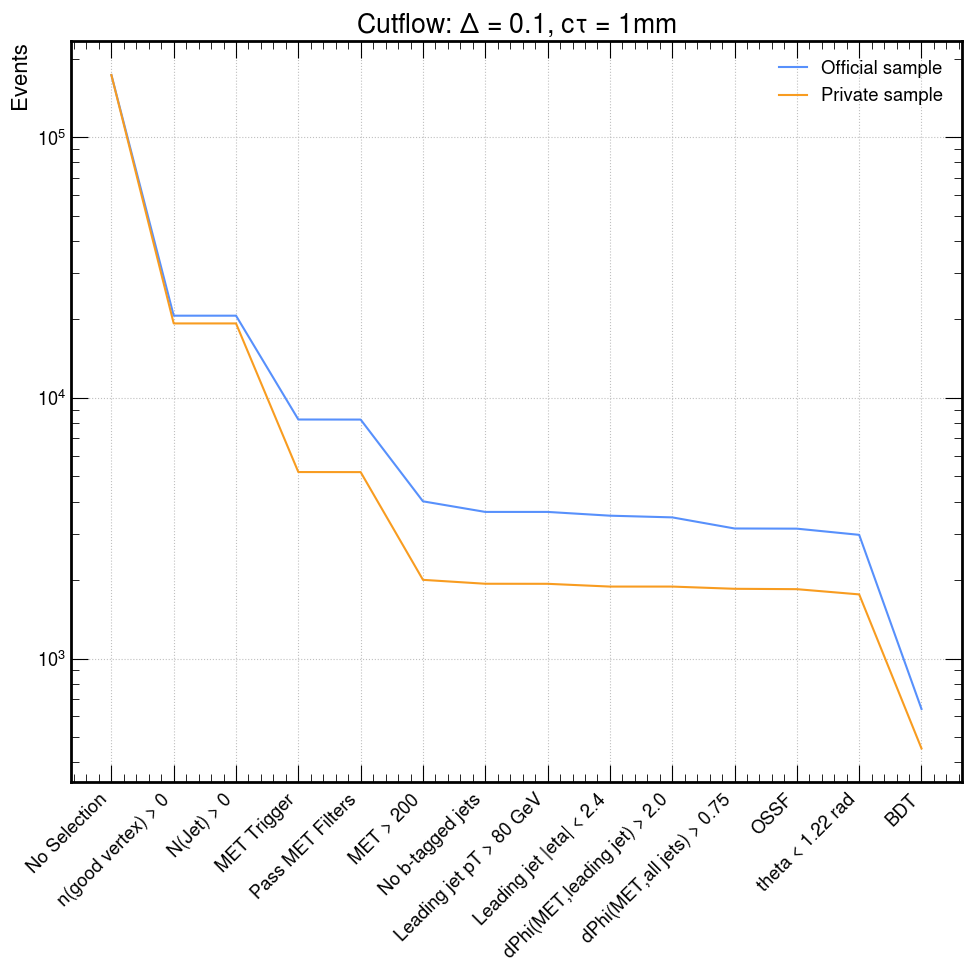

['No Selection', 'n(good vertex) > 0', 'N(Jet) > 0', 'MET Trigger', 'Pass MET Filters', 'MET > 200', 'No b-tagged jets', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 1.22 rad', 'BDT']
Saved: ./plots/cutflow//Cutflow_VR1_signal_delta_0p1_ct_10_m50to100.png
['No Selection', 'n(good vertex) > 0', 'N(Jet) > 0', 'MET Trigger', 'Pass MET Filters', 'MET > 200', 'No b-tagged jets', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 1.22 rad', 'BDT']
Saved: ./plots/cutflow//Cutflow_VR1_signal_delta_0p1_ct_10_m50to100.png


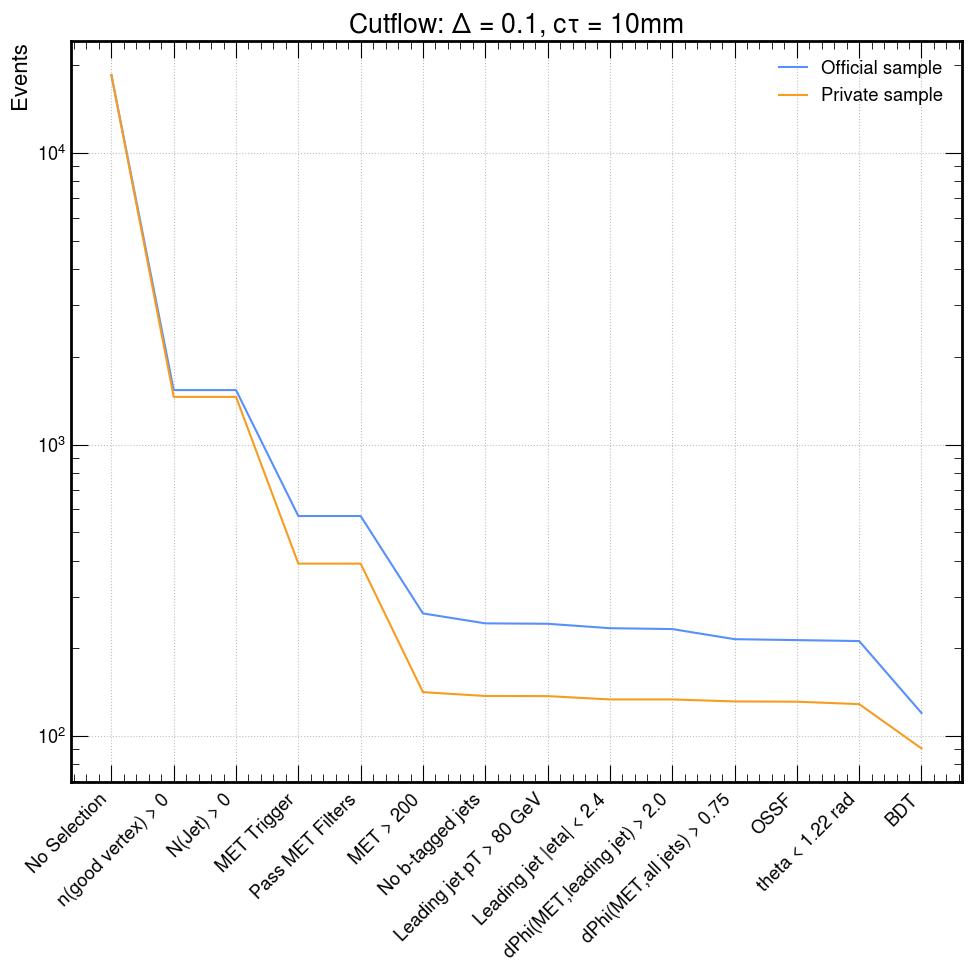

['No Selection', 'n(good vertex) > 0', 'N(Jet) > 0', 'MET Trigger', 'Pass MET Filters', 'MET > 200', 'No b-tagged jets', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 1.22 rad', 'BDT']
Saved: ./plots/cutflow//Cutflow_VR1_signal_delta_0p1_ct_100_m50to100.png
['No Selection', 'n(good vertex) > 0', 'N(Jet) > 0', 'MET Trigger', 'Pass MET Filters', 'MET > 200', 'No b-tagged jets', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 1.22 rad', 'BDT']
Saved: ./plots/cutflow//Cutflow_VR1_signal_delta_0p1_ct_100_m50to100.png


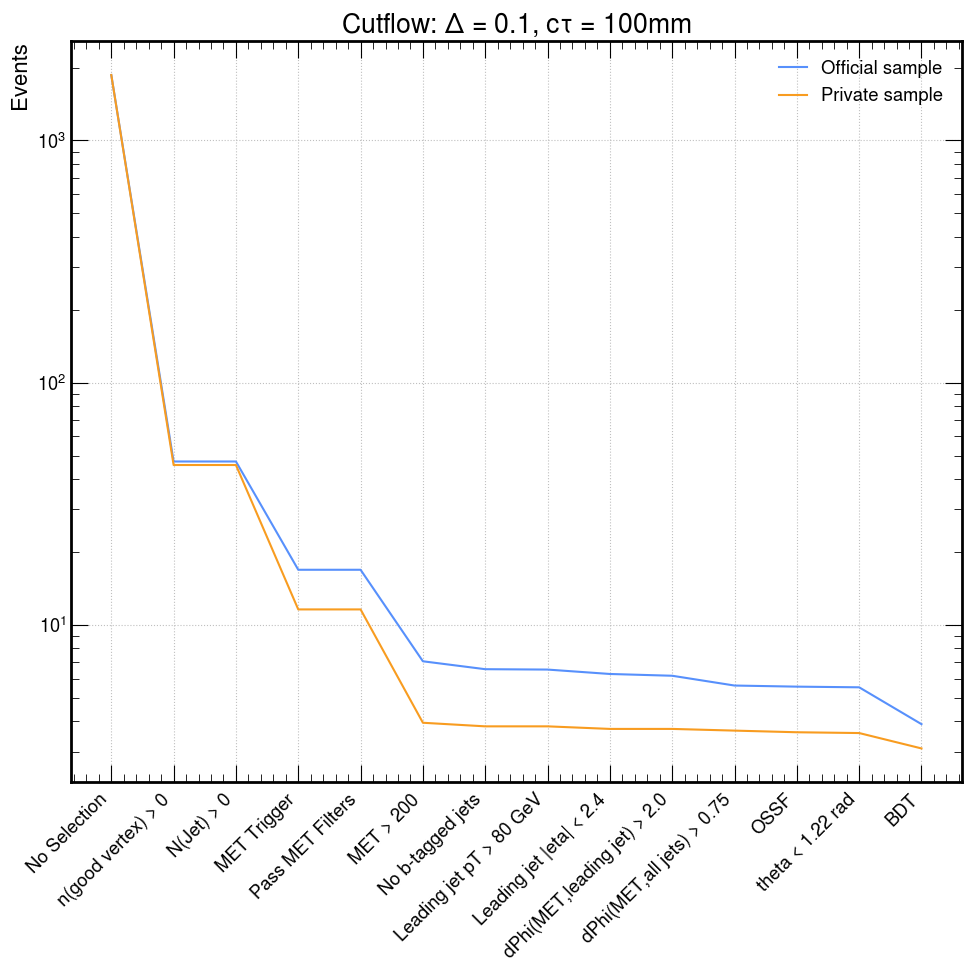

In [69]:
df_official = utils.get_signal_cutflow_dict(sig_histo_official, 'cutflow_cts')
df_private = utils.get_signal_cutflow_dict(sig_histo_private, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [50],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': '',
    'label': None
}

# Delta 0.1 1mm

for delta in [0.1]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_VR1_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m50to100.png"

        plot_dict_sig_eff['label'] = "Official sample"
        ptools.plot_signal_efficiency(sig_histo_official, df_official, plot_dict_sig_eff)
        
        plot_dict_sig_eff['label'] = "Private sample"
        ptools.plot_signal_efficiency(sig_histo_private, df_private, plot_dict_sig_eff)

        plt.grid()
        plt.savefig(f"./cutflow_SR_m50_delta0p1_ctau{ctau}_official_private.png", bbox_inches='tight')

        plt.show()

#        cutnames[0] = 'No Selection'
#        plt.xticks(ticks = np.arange(len(cutnames)), labels = cutnames, rotation = 45, ha = 'right')

['No Selection', 'n(good vertex) > 0', 'N(Jet) > 0', 'MET Trigger', 'Pass MET Filters', 'MET > 200', 'No b-tagged jets', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 1.22 rad', 'BDT']
Saved: ./plots/cutflow//Cutflow_VR1_signal_delta_0p1_ct_1_m50to100.png
['No Selection', 'n(good vertex) > 0', 'N(Jet) > 0', 'MET Trigger', 'Pass MET Filters', 'MET > 200', 'No b-tagged jets', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 1.22 rad', 'BDT']
Saved: ./plots/cutflow//Cutflow_VR1_signal_delta_0p1_ct_1_m50to100.png


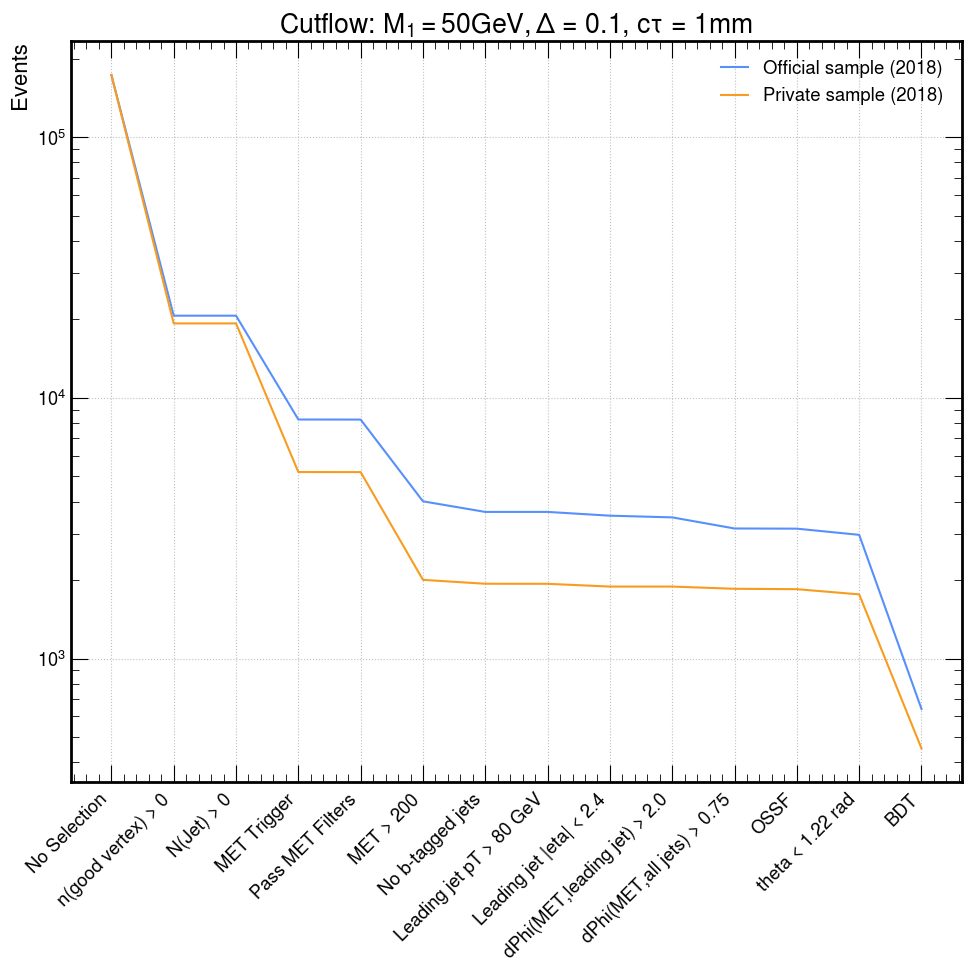

['No Selection', 'n(good vertex) > 0', 'N(Jet) > 0', 'MET Trigger', 'Pass MET Filters', 'MET > 200', 'No b-tagged jets', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 1.22 rad', 'BDT']
Saved: ./plots/cutflow//Cutflow_VR1_signal_delta_0p1_ct_10_m50to100.png
['No Selection', 'n(good vertex) > 0', 'N(Jet) > 0', 'MET Trigger', 'Pass MET Filters', 'MET > 200', 'No b-tagged jets', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 1.22 rad', 'BDT']
Saved: ./plots/cutflow//Cutflow_VR1_signal_delta_0p1_ct_10_m50to100.png


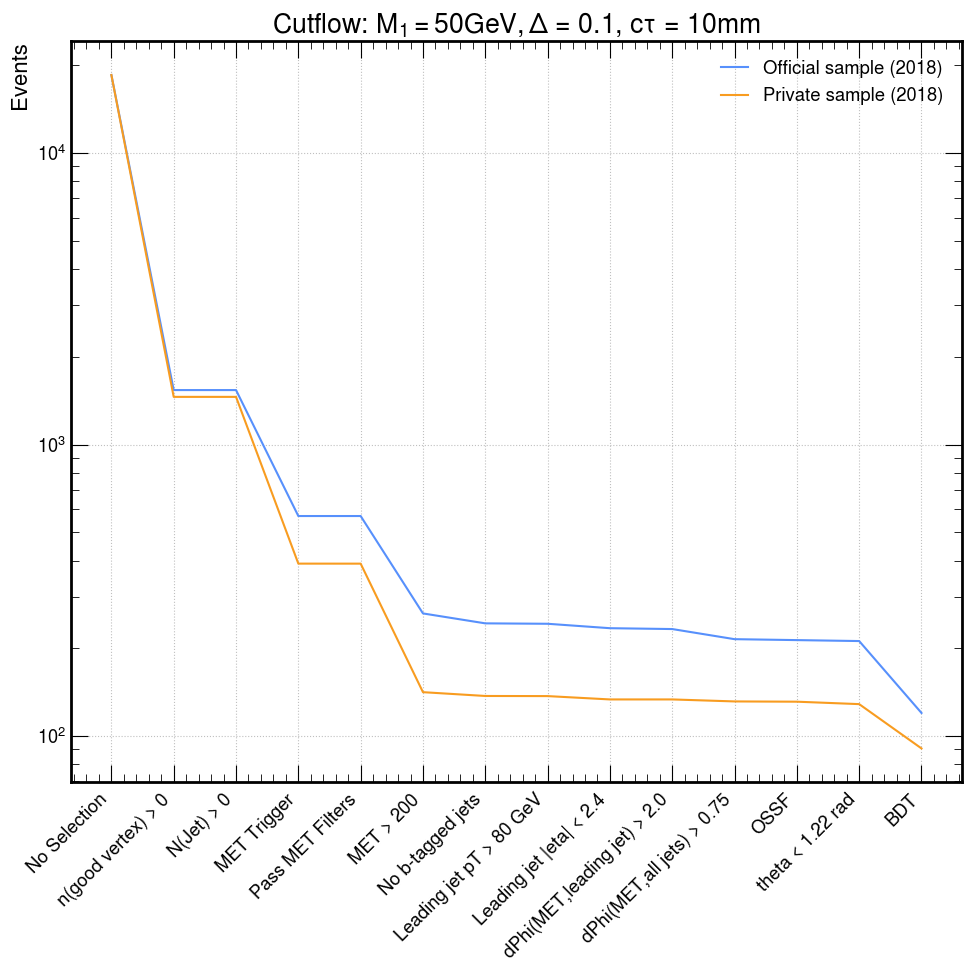

['No Selection', 'n(good vertex) > 0', 'N(Jet) > 0', 'MET Trigger', 'Pass MET Filters', 'MET > 200', 'No b-tagged jets', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 1.22 rad', 'BDT']
Saved: ./plots/cutflow//Cutflow_VR1_signal_delta_0p1_ct_100_m50to100.png
['No Selection', 'n(good vertex) > 0', 'N(Jet) > 0', 'MET Trigger', 'Pass MET Filters', 'MET > 200', 'No b-tagged jets', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 1.22 rad', 'BDT']
Saved: ./plots/cutflow//Cutflow_VR1_signal_delta_0p1_ct_100_m50to100.png


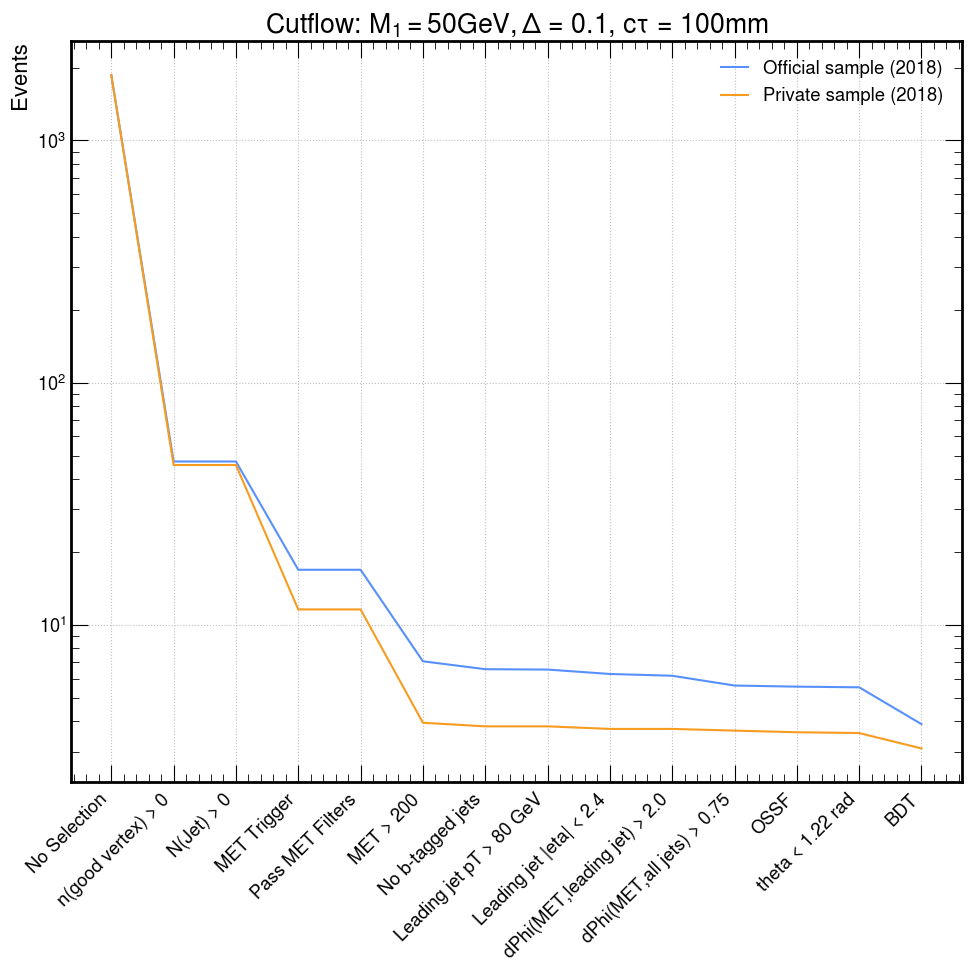

In [85]:
df_official = utils.get_signal_cutflow_dict(sig_histo_official, 'cutflow_cts')
df_private = utils.get_signal_cutflow_dict(sig_histo_private, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [50],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': '',
    'label': None
}

# Delta 0.1 1mm

for delta in [0.1]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $M_{1} = 50 GeV, \Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_VR1_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m50to100.png"

        plot_dict_sig_eff['label'] = "Official sample (2018)"
        histo = sig_histo_official_2018
        df = utils.get_signal_cutflow_dict(sig_histo_official_2018, 'cutflow_cts')
        ptools.plot_signal_efficiency(histo, df, plot_dict_sig_eff)

        plot_dict_sig_eff['label'] = "Private sample (2018)"
        histo = sig_histo_private_2018
        df = utils.get_signal_cutflow_dict(sig_histo_private_2018, 'cutflow_cts')
        ptools.plot_signal_efficiency(histo, df, plot_dict_sig_eff)
        
        '''
        plot_dict_sig_eff['label'] = "Official sample: 2018 (59.8fb-1)"
        histo = sig_histo_official_2018
        df = utils.get_signal_cutflow_dict(sig_histo_official_2018, 'cutflow_cts')
        ptools.plot_signal_efficiency(histo, df, plot_dict_sig_eff)

        plot_dict_sig_eff['label'] = "Official sample: 2017 (41.5fb-1)"
        histo = sig_histo_official_2017
        df = utils.get_signal_cutflow_dict(sig_histo_official_2017, 'cutflow_cts')
        ptools.plot_signal_efficiency(histo, df, plot_dict_sig_eff)

        plot_dict_sig_eff['label'] = "Official sample: 2016 postVFP (16.8fb-1)"
        histo = sig_histo_official_2016
        df = utils.get_signal_cutflow_dict(sig_histo_official_2016, 'cutflow_cts')
        ptools.plot_signal_efficiency(histo, df, plot_dict_sig_eff)

        plot_dict_sig_eff['label'] = "Official sample: 2016 preVFP (19.5fb-1)"
        histo = sig_histo_official_2016APV
        df = utils.get_signal_cutflow_dict(sig_histo_official_2016APV, 'cutflow_cts')
        ptools.plot_signal_efficiency(histo, df, plot_dict_sig_eff)
        '''
        
        plt.grid()
        plt.savefig(f"./cutflow_SR_m50_delta0p1_ctau{ctau}_official_private.png", bbox_inches='tight')

        plt.show()

#        cutnames[0] = 'No Selection'
#        plt.xticks(ticks = np.arange(len(cutnames)), labels = cutnames, rotation = 45, ha = 'right')

## Background

In [64]:
# efficiency
pd.options.display.float_format = '{:,.8f}'.format

bkg_eff_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow')
bkg_eff_df

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,theta < 1.22 rad,BDT
WJets,0.00115634,0.00001120,0.00001009,0.00001001,0.00000935,0.00000923,0.00000721,0.00000373,0.00000178,0.00000003
QCD,0.00000553,0.00000004,0.00000002,0.00000002,0.00000002,0.00000002,0.00000000,0.00000000,0.00000000,0.00000000
ZJets,0.00282343,0.00003681,0.00003281,0.00003248,0.00003053,0.00003010,0.00002547,0.00001317,0.00000628,0.00000008
DY,0.00001681,0.00000027,0.00000024,0.00000024,0.00000023,0.00000023,0.00000016,0.00000015,0.00000006,0.00000000
ZGamma,0.00037458,0.00001089,0.00000952,0.00000858,0.00000793,0.00000773,0.00000689,0.00000515,0.00000315,0.00000000
Multiboson,0.00080579,0.00000772,0.00000683,0.00000645,0.00000574,0.00000564,0.00000446,0.00000275,0.00000126,0.00000000
Top,0.00286307,0.00002298,0.00000595,0.00000585,0.00000554,0.00000546,0.00000370,0.00000205,0.00000132,0.00000001
Total,0.00002609,0.00000024,0.00000017,0.00000017,0.00000016,0.00000016,0.00000011,0.00000006,0.00000003,0.00000000


In [65]:
# Save as csv
outdir = f'./csv/{suffix}/Cutflow/Efficiency/'
outname = f'Background_Efficiency'

df_to_save = bkg_eff_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/2018_SR_goodVtx_v20_NoNJet/Cutflow/Efficiency//Background_Efficiency.csv


In [66]:
# weighted event count
pd.options.display.float_format = '{:,.2f}'.format
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts', isLegacy = False)

In [67]:
# Save to csv
outdir = f'./csv/{suffix}/Cutflow/EventCount_Weighted/'
outname = f'Background_EventCount_Weighted'

df_to_save = bkg_cts_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/2018_SR_goodVtx_v20_NoNJet/Cutflow/EventCount_Weighted//Background_EventCount_Weighted.csv


In [68]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,theta < 1.22 rad,BDT
WJets,1515663,9780,8121,8085,7790,7332,4354,2255,1092,17
QCD,67570,313,162,162,160,145,4,2,0,0
ZJets,913202,9190,7822,7786,7466,7186,4978,2624,1242,15
DY,1660,26,23,23,22,22,15,14,6,0
ZGamma,7690,177,154,142,133,131,100,63,34,0
Multiboson,29807,271,229,218,199,194,147,88,39,0
Top,265088,2527,873,854,682,672,495,282,164,4
Total,2800680,22284,17384,17270,16452,15682,10093,5328,2577,36


In [69]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

In [70]:
outdir = f'./csv/{suffix}/Cutflow/EventCount_Raw/'
outname = f'Background_EventCount_Raw'

df_to_save = bkg_cts_raw_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/2018_SR_goodVtx_v20_NoNJet/Cutflow/EventCount_Raw//Background_EventCount_Raw.csv


In [71]:
nBkg = bkg_cts_df.loc['Total'][-1]

print(f'Total number of backgrounds (weighted) after the last SR cut: {nBkg:.2f}')

Total number of backgrounds (weighted) after the last SR cut: 9.08


In [72]:
bkg_cts_df

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,theta < 1.22 rad,BDT
WJets,"245,028","2,374","2,138","2,121","1,981","1,955","1,527",790,378,7
QCD,"118,753",752,427,427,415,388,32,16,0,0
ZJets,"74,324",969,864,855,804,792,670,347,165,2
DY,"5,426",87,77,77,74,74,50,47,20,0
ZGamma,"1,921",56,49,44,41,40,35,26,16,0
Multiboson,"5,616",54,48,45,40,39,31,19,9,0
Top,"125,332","1,006",261,256,242,239,162,90,58,0
Total,"576,400","5,297","3,863","3,826","3,596","3,527","2,509","1,335",646,9


In [73]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df[bkg_cts_df.columns.values[-1]]).transpose(), pd.DataFrame(bkg_cts_raw_df[bkg_cts_df.columns.values[-1]]).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

,WJets,QCD,ZJets,DY,ZGamma,Multiboson,Top,Total
Weighted Counts,6.55,0.00,2.18,0.00,0.00,0.00,0.35,9.08
Raw Counts,17.00,0.00,15.00,0.00,0.00,0.00,4.00,36.00


In [74]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df[bkg_cts_df.columns.values[-3]]).transpose(), pd.DataFrame(bkg_cts_raw_df[bkg_cts_df.columns.values[-3]]).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

,WJets,QCD,ZJets,DY,ZGamma,Multiboson,Top,Total
Weighted Counts,790.48,16.20,346.66,46.86,26.39,19.13,89.57,"1,335.29"
Raw Counts,"2,255.00",2.00,"2,624.00",14.00,63.00,88.00,282.00,"5,328.00"


KeyError: 'DYLowMass'

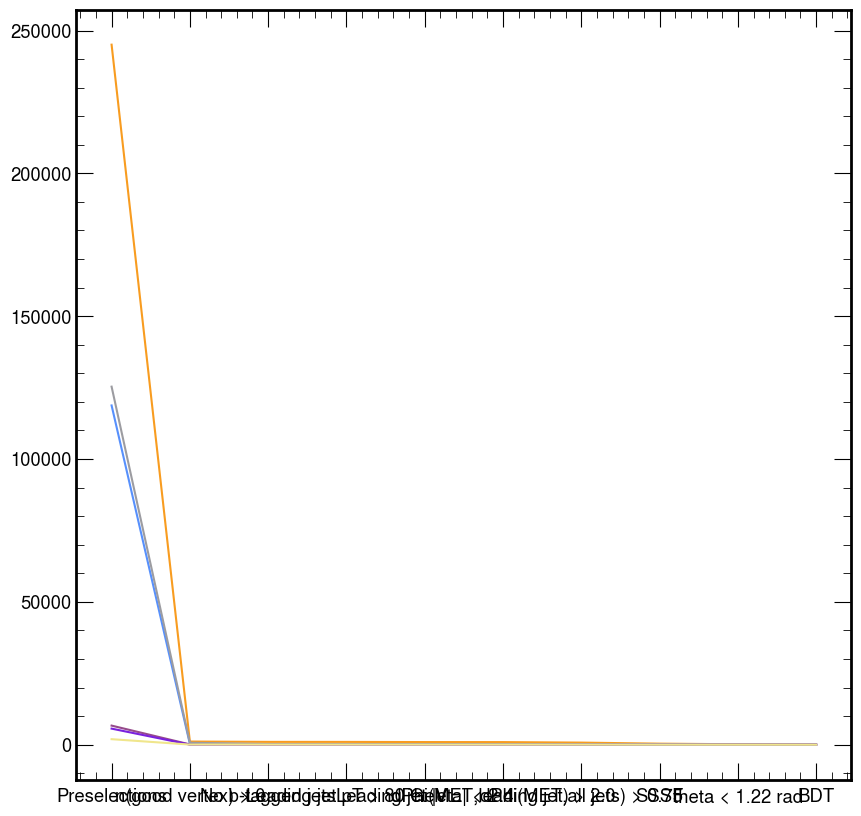

In [17]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_bkg_eff = {
    # Select processes
    'processes': 'all', # Otherwise, give as a list; ['WJets', 'ZJets', 'Total']

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': f'./plots/{suffix}/cutflow/',
    'outName': f'Cutflow_background.png'
}

# For all processes
ptools.plot_bkg_efficiency(bkg_histo, df, plot_dict_bkg_eff)

KeyError: 'DYLowMass'

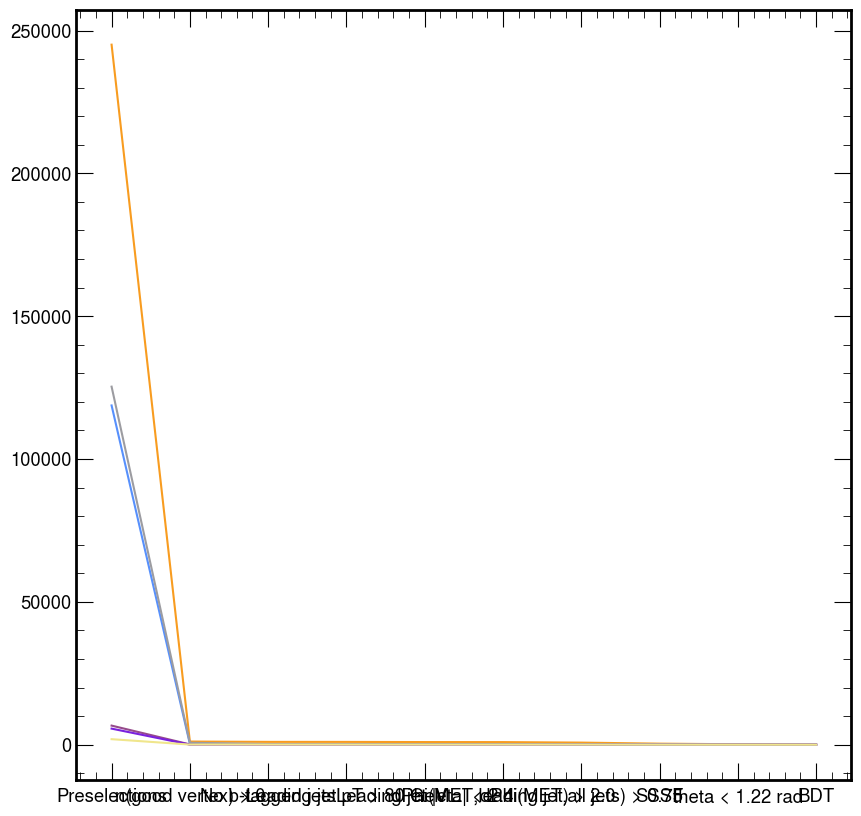

In [18]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_bkg_eff = {
    # Select processes
    'processes': 'all', # Otherwise, give as a list; ['WJets', 'ZJets', 'Total']

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': f'./plots/{suffix}/cutflow/',
    'outName': f'Cutflow_background.png'
}

# For all processes
ptools.plot_bkg_efficiency(bkg_histo, df, plot_dict_bkg_eff)

## Data

In [19]:
pd.options.display.float_format = '{:,.1f}'.format
data_cts_df = utils.get_data_cutflow_dict(data_histo, 'cutflow_cts')
data_cts_df

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",SSSF,theta < 1.22 rad,BDT
data_2018_Data_MET_UL18_MET_Run2018D,"510,790.0","2,168.0","1,495.0","1,465.0","1,027.0",997.0,731.0,329.0,135.0,4.0
data_2018_Data_MET_UL18_MET_Run2018C,"123,605.0",558.0,412.0,407.0,275.0,270.0,192.0,82.0,35.0,0.0
data_2018_Data_MET_UL18_MET_Run2018B,"98,383.0",464.0,342.0,339.0,225.0,219.0,163.0,78.0,37.0,0.0
data_2018_Data_MET_UL18_MET_Run2018A,"179,414.0",854.0,612.0,605.0,374.0,367.0,259.0,116.0,53.0,3.0
Total,"912,192.0","4,044.0","2,861.0","2,816.0","1,901.0","1,853.0","1,345.0",605.0,260.0,7.0


In [20]:
pd.options.display.float_format = '{:,.1f}'.format

data_composition = pd.DataFrame(data_cts_df[data_cts_df.columns.values[-1]]).transpose()

data_composition = data_composition.rename(index={data_cts_df.columns.values[-1]: 'Data Yield'})
data_composition = data_composition.rename(columns={'data_2018_Data_MET_UL18_MET_Run2018C': 'Run2018C', \
                                                   'data_2018_Data_MET_UL18_MET_Run2018B': 'Run2018B', \
                                                    'data_2018_Data_MET_UL18_MET_Run2018A': 'Run2018A', \
                                                    'data_2018_Data_MET_UL18_MET_Run2018D': 'Run2018D'
                                                   })

data_composition = data_composition.reindex(sorted(data_composition.columns), axis=1)

data_composition

,Run2018A,Run2018B,Run2018C,Run2018D,Total
Data Yield,3.0,0.0,0.0,4.0,7.0


## Data/MC

In [21]:
# Data/background MC
data_yield = utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total']
mc_yield = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts').loc['Total']

data_yield / mc_yield

Preselections                 1.6
n(good vertex) > 0            1.7
No b-tagged jets              1.7
Leading jet pT > 80 GeV       1.7
Leading jet |eta| < 2.4       1.2
dPhi(MET,leading jet) > 2.0   1.2
dPhi(MET,all jets) > 0.75     1.2
SSSF                          1.2
theta < 1.22 rad              1.2
BDT                           1.0
Name: Total, dtype: float64

In [75]:
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')
nBkg = bkg_cts_df.loc['Total'][-1]

nBkg

9.079261911931491

In [76]:
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')
table = cts_cutflow

cutnames = utils.get_signal_list_of_cuts(sig_histo)
table.columns = cutnames

In [77]:
pd.options.display.float_format = '{:,.4f}'.format


In [78]:
df = pd.DataFrame(table.loc[:, cutnames[-1]]) # last cut
df = utils.add_signal_info_to_df(df)
df

,BDT,m1,delta,ctau
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,"1,715.0751",5.0000,0.1000,1.0000
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,2.9986,5.0000,0.1000,100.0000
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,158.3267,5.0000,0.2000,1.0000
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,168.6700,5.0000,0.1000,10.0000
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,14.8754,5.0000,0.2000,10.0000
...,...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10,0.6777,100.0000,0.2000,10.0000
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10,19.2866,100.0000,0.1000,10.0000
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1,3.0104,100.0000,0.2000,1.0000
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1,79.3341,100.0000,0.1000,1.0000


In [79]:
# Missing rows
#df[ (df['m1'] == 60) & (df['delta'] == 0.2) ]

df.loc[len(df.index)] = [0, 60, 0.2, 1]
df.loc[len(df.index)] = [0, 60, 0.2, 10]
df.loc[len(df.index)] = [0, 60, 0.2, 100]
df.loc[len(df.index)] = [0, 80, 0.2, 1] 

df = df.sort_values(by=['m1']) # sort by m1

In [80]:
df = df.rename(columns={df.columns[0]: 'Signal'})

df['Background'] = nBkg
df['S/sqrt(B)'] = df['Signal'] / np.sqrt(df['Background'])

df = df[['m1', 'delta', 'ctau', 'Signal', 'Background', 'S/sqrt(B)']]

df

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,5.0000,0.1000,1.0000,"1,715.0751",9.0793,569.1908
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,5.0000,0.1000,100.0000,2.9986,9.0793,0.9952
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,5.0000,0.2000,1.0000,158.3267,9.0793,52.5447
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,5.0000,0.1000,10.0000,168.6700,9.0793,55.9774
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,5.0000,0.2000,10.0000,14.8754,9.0793,4.9368
...,...,...,...,...,...,...
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10,100.0000,0.1000,10.0000,19.2866,9.0793,6.4007
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1,100.0000,0.2000,1.0000,3.0104,9.0793,0.9991
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1,100.0000,0.1000,1.0000,79.3341,9.0793,26.3290
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,100.0000,0.1000,100.0000,0.7677,9.0793,0.2548


In [81]:
outdir = './csv/SR_Yields/'
outname = f'SR_S_over_B'

df_to_save = df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/SR_Yields//SR_S_over_B.csv


In [82]:
ct = 1.0


In [83]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,5.0,0.1,1.0,"1,715.0751",9.0793,569.1908
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,10.0,0.1,1.0,"1,913.0692",9.0793,634.9001
sig_2018_Mchi-21p0_dMchi-2p0_ctau-1,20.0,0.1,1.0,"1,806.3712",9.0793,599.4897
sig_2018_Mchi-31p5_dMchi-3p0_ctau-1,30.0,0.1,1.0,"2,067.0329",9.0793,685.9968
sig_2018_Mchi-42p0_dMchi-4p0_ctau-1,40.0,0.1,1.0,"1,108.0513",9.0793,367.7347
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,50.0,0.1,1.0,458.6430,9.0793,152.2122
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,60.0,0.1,1.0,285.6864,9.0793,94.8122
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,70.0,0.1,1.0,200.0185,9.0793,66.3812
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,80.0,0.1,1.0,136.7777,9.0793,45.3931
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,90.0,0.1,1.0,111.7092,9.0793,37.0735


In [84]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,5.0,0.2,1.0,158.3267,9.0793,52.5447
sig_2018_Mchi-11p0_dMchi-2p0_ctau-1,10.0,0.2,1.0,116.9305,9.0793,38.8063
sig_2018_Mchi-22p0_dMchi-4p0_ctau-1,20.0,0.2,1.0,95.1751,9.0793,31.5863
sig_2018_Mchi-33p0_dMchi-6p0_ctau-1,30.0,0.2,1.0,"5,400.9644",9.0793,"1,792.4458"
sig_2018_Mchi-44p0_dMchi-8p0_ctau-1,40.0,0.2,1.0,55.7755,9.0793,18.5105
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,50.0,0.2,1.0,20.4075,9.0793,6.7727
62,60.0,0.2,1.0,0.0000,9.0793,0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,70.0,0.2,1.0,8.4089,9.0793,2.7907
65,80.0,0.2,1.0,0.0000,9.0793,0.0000
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,90.0,0.2,1.0,4.1717,9.0793,1.3845


In [85]:
ct = 10.0


In [86]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,5.0,0.1,10.0,168.6700,9.0793,55.9774
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,10.0,0.1,10.0,272.5252,9.0793,90.4444
sig_2018_Mchi-21p0_dMchi-2p0_ctau-10,20.0,0.1,10.0,346.1113,9.0793,114.8657
sig_2018_Mchi-31p5_dMchi-3p0_ctau-10,30.0,0.1,10.0,"3,740.0235",9.0793,"1,241.2209"
sig_2018_Mchi-42p0_dMchi-4p0_ctau-10,40.0,0.1,10.0,243.5477,9.0793,80.8274
sig_2018_Mchi-52p5_dMchi-5p0_ctau-10,50.0,0.1,10.0,95.4219,9.0793,31.6681
sig_2018_Mchi-63p0_dMchi-6p0_ctau-10,60.0,0.1,10.0,60.8366,9.0793,20.1902
sig_2018_Mchi-73p5_dMchi-7p0_ctau-10,70.0,0.1,10.0,45.4974,9.0793,15.0994
sig_2018_Mchi-84p0_dMchi-8p0_ctau-10,80.0,0.1,10.0,32.1821,9.0793,10.6804
sig_2018_Mchi-94p5_dMchi-9p0_ctau-10,90.0,0.1,10.0,25.0565,9.0793,8.3156


In [87]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,5.0,0.2,10.0,14.8754,9.0793,4.9368
sig_2018_Mchi-11p0_dMchi-2p0_ctau-10,10.0,0.2,10.0,13.4495,9.0793,4.4635
sig_2018_Mchi-22p0_dMchi-4p0_ctau-10,20.0,0.2,10.0,15.4143,9.0793,5.1156
sig_2018_Mchi-33p0_dMchi-6p0_ctau-10,30.0,0.2,10.0,"2,890.9901",9.0793,959.4478
sig_2018_Mchi-44p0_dMchi-8p0_ctau-10,40.0,0.2,10.0,9.5770,9.0793,3.1784
sig_2018_Mchi-55p0_dMchi-10p0_ctau-10,50.0,0.2,10.0,3.8324,9.0793,1.2719
63,60.0,0.2,10.0,0.0000,9.0793,0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-10,70.0,0.2,10.0,1.6562,9.0793,0.5496
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10,80.0,0.2,10.0,1.1801,9.0793,0.3916
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,90.0,0.2,10.0,0.8881,9.0793,0.2947


In [88]:
ct = 100.0


In [89]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,5.0,0.1,100.0,2.9986,9.0793,0.9952
sig_2018_Mchi-10p5_dMchi-1p0_ctau-100,10.0,0.1,100.0,5.4568,9.0793,1.8110
sig_2018_Mchi-21p0_dMchi-2p0_ctau-100,20.0,0.1,100.0,9.2870,9.0793,3.0821
sig_2018_Mchi-31p5_dMchi-3p0_ctau-100,30.0,0.1,100.0,"1,387.8733",9.0793,460.6007
sig_2018_Mchi-42p0_dMchi-4p0_ctau-100,40.0,0.1,100.0,7.2145,9.0793,2.3943
sig_2018_Mchi-52p5_dMchi-5p0_ctau-100,50.0,0.1,100.0,3.2872,9.0793,1.0909
sig_2018_Mchi-63p0_dMchi-6p0_ctau-100,60.0,0.1,100.0,2.2262,9.0793,0.7388
sig_2018_Mchi-73p5_dMchi-7p0_ctau-100,70.0,0.1,100.0,1.5628,9.0793,0.5187
sig_2018_Mchi-84p0_dMchi-8p0_ctau-100,80.0,0.1,100.0,1.2222,9.0793,0.4056
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,90.0,0.1,100.0,0.9645,9.0793,0.3201


In [90]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,5.0,0.2,100.0,0.1935,9.0793,0.0642
sig_2018_Mchi-11p0_dMchi-2p0_ctau-100,10.0,0.2,100.0,0.2897,9.0793,0.0962
sig_2018_Mchi-22p0_dMchi-4p0_ctau-100,20.0,0.2,100.0,0.3969,9.0793,0.1317
sig_2018_Mchi-33p0_dMchi-6p0_ctau-100,30.0,0.2,100.0,96.9597,9.0793,32.1785
sig_2018_Mchi-44p0_dMchi-8p0_ctau-100,40.0,0.2,100.0,0.2924,9.0793,0.0970
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,50.0,0.2,100.0,0.1263,9.0793,0.0419
64,60.0,0.2,100.0,0.0000,9.0793,0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-100,70.0,0.2,100.0,0.0566,9.0793,0.0188
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,80.0,0.2,100.0,0.0483,9.0793,0.0160
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,90.0,0.2,100.0,0.0348,9.0793,0.0115
